<a href="https://colab.research.google.com/github/Cyber-Dust/DSCI250/blob/main/zuckflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from collections import Counter
import itertools 
import numpy as np
import missingno as msno
import seaborn as sns
import math
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
import requests
from lxml import html
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

data = pd.read_csv('netflix_titles.csv')

data['listed_in']


l1 = []
for value in data['listed_in']:
  l1.append(value.split(','))

l1

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movies', ' Comedies'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Documentaries', ' International Movies'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['Crime TV Shows', '

In [ ]:
one_d = []
for item in l1:
  for item1 in item:
    one_d.append(item)

one_d

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['Dramas', ' Indep

In [ ]:
unit_list = []
for item in one_d:
  if item not in unit_list:
    unit_list.append(item)

len(unit_list)

514

In [ ]:
unit_list

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movies', ' Comedies'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Documentaries', ' International Movies'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['International TV Shows', ' TV Action & Adventure', ' TV Dramas'],
 ['Comedies', ' Internatio

In [ ]:
# one_d = []
# for item in l1:
#   for item1 in item:
#     one_d.append(item)

# genreList = list(set(list(itertools.chain.from_iterable(one_d))))
# Counter(tuple(genreList))

genre_list = Counter(data.listed_in.apply(lambda x: pd.Series(x.split(','))).stack().values)

genre_list.most_common(5)


# sns.set(style='white')

# plt.figure(figsize=(15, 8))
# plt.title('Count of movie Genres', size=20)
# genreList = genreList.most_common(15)
# ax = sns.barplot(x=genreList.elements(), y=genreList.elements(), palette='coolwarm')
# plt.xlabel('Genre', size=15)
# plt.ylabel('Count', size=15)
# for i, v in enumerate(genreList.values):
#     plt.text(x=40, y=i+0.12, s=v, color='k', fontsize=12.5)
# plt.show()


[(' International Movies', 2624),
 ('Dramas', 1600),
 ('Comedies', 1210),
 ('Action & Adventure', 859),
 ('Documentaries', 829)]

#TOP 5 COUNTRIES

In [ ]:
country_list = Counter(data.country.values)

country_list.most_common(5)

[('United States', 2818),
 ('India', 972),
 (nan, 831),
 ('United Kingdom', 419),
 ('Japan', 245)]

#NEED TO CLEAN THE DATA AND GET RID OF ALL THE NAN

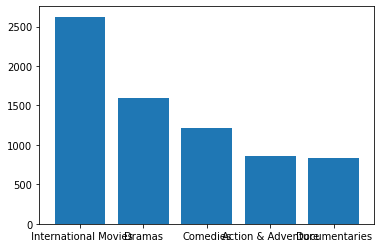

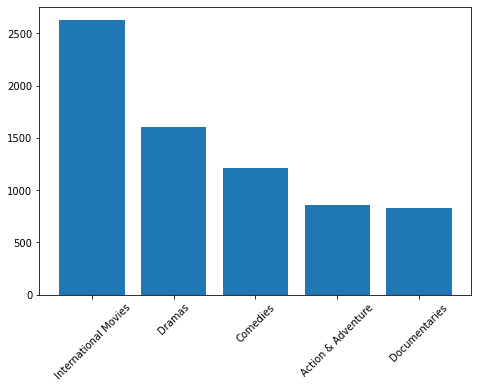

In [9]:
data = {' International Movies': 2624,
 'Dramas': 1600,
 'Comedies': 1210,
 'Action & Adventure': 859,
 'Documentaries': 829}

# FIRST GRAPH
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

# SECOND GRAPH

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(names, values)
#this one line of code tils the x axis
plt.xticks(rotation=45)
plt.show()

# THIRD GRAPH with tilted X axis
# ds = pd.Series(data)
# ax = sns.countplot(x="Column", data=ds)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
# plt.show()

In [ ]:
genre_list

Counter({' Anime Features': 50,
         ' Children & Family Movies': 36,
         ' Classic & Cult TV': 6,
         ' Classic Movies': 36,
         ' Comedies': 464,
         ' Crime TV Shows': 71,
         ' Cult Movies': 59,
         ' Documentaries': 40,
         ' Docuseries': 174,
         ' Dramas': 827,
         ' Faith & Spirituality': 65,
         ' Horror Movies': 82,
         ' Independent Movies': 736,
         ' International Movies': 2624,
         ' International TV Shows': 577,
         " Kids' TV": 63,
         ' Korean TV Shows': 151,
         ' LGBTQ Movies': 101,
         ' Music & Musicals': 357,
         ' Reality TV': 135,
         ' Romantic Movies': 613,
         ' Romantic TV Shows': 338,
         ' Sci-Fi & Fantasy': 230,
         ' Science & Nature TV': 92,
         ' Spanish-Language TV Shows': 172,
         ' Sports Movies': 218,
         ' Stand-Up Comedy': 9,
         ' Stand-Up Comedy & Talk Shows': 22,
         ' TV Action & Adventure': 128,
         